In [1]:
# necessary imports
import sys
import pandas as pd
import dvc.api
import mlflow
import warnings
warnings.filterwarnings('ignore')

In [2]:
# adding and setting up helper scripts
sys.path.insert(1, './../scripts/')
import defaults as defs
import dataCleaner as dc
import dataVisualizer as dv
import generalHelper as hp

cleaner = dc.dataCleaner('EDA notebook')
visualizer = dv.dataVisualizer('EDA notebook')
helper = hp.generalHelper('EDA notebook')

# mlflow setups
# mlflow.set_experiment('Eda runs')
# mlflow.start_run()

--> <Logger dataCleaner (WARNING)>
logger <Logger dataCleaner (DEBUG)> created at path: ../logs/cleaner_root.log
Data cleaner in action
--> <Logger dataVisualizer (WARNING)>
logger <Logger dataVisualizer (DEBUG)> created at path: ../logs/visualizer_root.log
Data visualizer in action
--> <Logger generalHelper (WARNING)>
logger <Logger generalHelper (DEBUG)> created at path: ../logs/general_helper_root.log
General helper in action


<ActiveRun: >

In [3]:
# version of the data
# v1: raw-data
version= 'v1'

# set up the data url
data1= dvc.api.get_url(path= defs.data1,         	 # path to the data file
		               repo= defs.repo_for_nb,       # path to the repository
		               rev= version)                 # version of the data

data2= dvc.api.get_url(path= defs.data2,         	 # path to the data file
		               repo= defs.repo_for_nb,       # path to the repository
		               rev= version)                 # version of the data

In [4]:
# print the data path
print(f'data path(s):\n{data1}\n{data2}')

data path(s):
/home/f0x-tr0t/Documents/10X//dc/31a6d9ca5315cecd1bf0cfee00a7e0
/home/f0x-tr0t/Documents/10X//10/02707afa69972e511a60575fbc6293


Storing the data locally

In [5]:
date = ['Trip Start Time', 'Trip End Time'] # the date column name
missing_values = ["n/a", "na", "undefined", '?', 'NA', 'undefined']

# read CSV 
df1 = pd.read_csv(data1, na_values=missing_values, parse_dates=date)
df2 = pd.read_csv(data2, na_values=missing_values)

# Data preparation, EDA, and feature Engineering

We are going to take an in depth look at the data sets provided by [Gokada](https://www.gokada.ng/)

But first lets make some Data preparation, then we will take a further in depth look at EDA, and finally feature engineering 

## Data preparation

### Setting up the first data frame - Trips

In [6]:
df1[:7]

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36
5,392005,"6.565087699999999,3.3844415","6.499696300000001,3.3509075",2021-07-01 10:53:36,2021-07-01 11:27:51
6,392009,"6.6636484,3.3082058","6.6185421,3.301634",2021-07-01 06:39:51,2021-07-01 07:41:12


Sample data from the first data frame

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Trip ID           536020 non-null  int64         
 1   Trip Origin       536020 non-null  object        
 2   Trip Destination  536020 non-null  object        
 3   Trip Start Time   534369 non-null  datetime64[ns]
 4   Trip End Time     536019 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 20.4+ MB


We have five features in the firs data set, all telling us about the trip and its several attributes

In [8]:
df1.describe()

,Trip ID
count,5.360200e+05
mean,9.910221e+05
std,3.456364e+05
min,3.919960e+05
25%,6.935610e+05
50%,9.910085e+05
75%,1.281570e+06
max,1.637709e+06


As we can see only the trip id has numeric values, all data values will be changed to their appropriate data types

Trip Destination and Trip Origin

TRIP ID

In [9]:
df1['Trip ID'].min(), df1['Trip ID'].max()

(391996, 1637709)

the trip Id's are between 391, 996 and 1, 637, 709

This indicates at least to some degree not all of the data was provided at this point in time

In [10]:
df1['Trip ID'].value_counts()

391996     1
1180070    1
1180061    1
1180060    1
1180059    1
          ..
789757     1
789755     1
789751     1
789750     1
1637709    1
Name: Trip ID, Length: 536020, dtype: int64

All trip id's are unique

TRIP ORIGIN AND DESTINATION

In [11]:
df1[['Trip Destination', 'Trip Origin']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Trip Destination  536020 non-null  object
 1   Trip Origin       536020 non-null  object
dtypes: object(2)
memory usage: 8.2+ MB


Their data types are of object converting to latitude and longitude

In [12]:
# separate latitude and longitude
df1['Trip_Origin_lat'] = df1['Trip Origin'].apply(lambda x: str(x).split(',')[0])
df1['Trip_Origin_lon'] = df1['Trip Origin'].apply(lambda x: str(x).split(',')[1])

df1['Trip_Destination_lat'] = df1['Trip Destination'].apply(lambda x: str(x).split(',')[0])
df1['Trip_Destination_lon'] = df1['Trip Destination'].apply(lambda x: str(x).split(',')[1])

In [13]:
df1[:7]

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time,Trip_Origin_lat,Trip_Origin_lon,Trip_Destination_lat,Trip_Destination_lon
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37,6.508813001668548,3.37740316890347,6.650969799999999,3.3450307
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28,6.4316714,3.4555375,6.4280814653326,3.4721885847586
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23,6.631679399999999,3.3388976,6.508324099999999,3.3590397
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42,6.572757200000001,3.3677082,6.584881099999999,3.3614073
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,6.6010417,3.2766339,6.4501069,3.3916154
5,392005,"6.565087699999999,3.3844415","6.499696300000001,3.3509075",2021-07-01 10:53:36,2021-07-01 11:27:51,6.565087699999999,3.3844415,6.499696300000001,3.3509075
6,392009,"6.6636484,3.3082058","6.6185421,3.301634",2021-07-01 06:39:51,2021-07-01 07:41:12,6.6636484,3.3082058,6.6185421,3.301634


In [14]:
# remove the original features
df1 = cleaner.remove_unwanted_cols(df1, ['Trip Origin', 'Trip Destination'])

feature: Trip Origin removed successfully
feature: Trip Destination removed successfully


In [15]:
df1[:7]

,Trip ID,Trip Start Time,Trip End Time,Trip_Origin_lat,Trip_Origin_lon,Trip_Destination_lat,Trip_Destination_lon
0,391996,2021-07-01 07:28:04,2021-07-01 07:29:37,6.508813001668548,3.37740316890347,6.650969799999999,3.3450307
1,391997,2021-07-01 06:38:04,2021-07-01 07:07:28,6.4316714,3.4555375,6.4280814653326,3.4721885847586
2,391998,2021-07-01 06:21:02,2021-07-01 07:02:23,6.631679399999999,3.3388976,6.508324099999999,3.3590397
3,391999,2021-07-01 07:16:07,2021-07-01 07:29:42,6.572757200000001,3.3677082,6.584881099999999,3.3614073
4,392001,2021-07-01 09:30:59,2021-07-01 09:34:36,6.6010417,3.2766339,6.4501069,3.3916154
5,392005,2021-07-01 10:53:36,2021-07-01 11:27:51,6.565087699999999,3.3844415,6.499696300000001,3.3509075
6,392009,2021-07-01 06:39:51,2021-07-01 07:41:12,6.6636484,3.3082058,6.6185421,3.301634


In [16]:
df1[['Trip_Origin_lat', 'Trip_Origin_lon', 'Trip_Destination_lat', 'Trip_Destination_lon']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Trip_Origin_lat       536020 non-null  object
 1   Trip_Origin_lon       536020 non-null  object
 2   Trip_Destination_lat  536020 non-null  object
 3   Trip_Destination_lon  536020 non-null  object
dtypes: object(4)
memory usage: 16.4+ MB


converting the object data types to floating number data types

In [17]:
df1 = cleaner.convert_to_numeric(df1, ['Trip_Origin_lat', 'Trip_Origin_lon', 'Trip_Destination_lat', 'Trip_Destination_lon'])

feature: Trip_Origin_lat converted to numeric data type format
feature: Trip_Origin_lon converted to numeric data type format
feature: Trip_Destination_lat converted to numeric data type format
feature: Trip_Destination_lon converted to numeric data type format


In [18]:
df1[['Trip_Origin_lat', 'Trip_Origin_lon', 'Trip_Destination_lat', 'Trip_Destination_lon']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Trip_Origin_lat       536020 non-null  float64
 1   Trip_Origin_lon       536020 non-null  float64
 2   Trip_Destination_lat  536020 non-null  float64
 3   Trip_Destination_lon  536020 non-null  float64
dtypes: float64(4)
memory usage: 16.4 MB


Data types converted successfully, this will come in handy latter when making calculations on the locations

In [19]:
df1[['Trip_Origin_lat', 'Trip_Origin_lon', 'Trip_Destination_lat', 'Trip_Destination_lon']].isna().sum()

Trip_Origin_lat         0
Trip_Origin_lon         0
Trip_Destination_lat    0
Trip_Destination_lon    0
dtype: int64

There are no nulls in the trip origin and destination features

Calculating the distance between the locations

In [20]:
from geopy import distance
df1['Distance']=df1.apply(lambda x:distance.distance((x["Trip_Origin_lat"],x["Trip_Origin_lon"]), (x["Trip_Destination_lat"],x["Trip_Destination_lon"])).km, axis=1)

In [21]:
df1[:7]

,Trip ID,Trip Start Time,Trip End Time,Trip_Origin_lat,Trip_Origin_lon,Trip_Destination_lat,Trip_Destination_lon,Distance
0,391996,2021-07-01 07:28:04,2021-07-01 07:29:37,6.508813,3.377403,6.650970,3.345031,16.123451
1,391997,2021-07-01 06:38:04,2021-07-01 07:07:28,6.431671,3.455538,6.428081,3.472189,1.884305
2,391998,2021-07-01 06:21:02,2021-07-01 07:02:23,6.631679,3.338898,6.508324,3.359040,13.822393
3,391999,2021-07-01 07:16:07,2021-07-01 07:29:42,6.572757,3.367708,6.584881,3.361407,1.511034
4,392001,2021-07-01 09:30:59,2021-07-01 09:34:36,6.601042,3.276634,6.450107,3.391615,20.984319
5,392005,2021-07-01 10:53:36,2021-07-01 11:27:51,6.565088,3.384441,6.499696,3.350907,8.127195
6,392009,2021-07-01 06:39:51,2021-07-01 07:41:12,6.663648,3.308206,6.618542,3.301634,5.040921


Distance between the start and end trip locations added

In [22]:
df1['Distance'].min(), df1['Distance'].max()

(0.0, 680.0808474078148)

The min and max values calculated for the distance are 0 and 680 (km) respectively.

NB. This is not the route that is being calculated, rather the shortest path between the locations 

TRIP START AND END TIMES

In [23]:
df1[['Trip Start Time', 'Trip End Time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Trip Start Time  534369 non-null  datetime64[ns]
 1   Trip End Time    536019 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 8.2 MB


Data types matches the feature

In [24]:
df1['Trip Start Time'].isna().sum(), df1['Trip End Time'].isna().sum()

(1651, 1)

In [25]:
cleaner.percent_missing(df1)

The dataset contains 0.0385247% missing values


There are around 1, 650 missing values for the Trip starting time and only 1 missing value for trip ending time

This constitutes of only around a 0.03% of missing data values for data frame one

These null values will be handled latter, since they are very small in number, but the trip id's will be recorded for further investigation

In [26]:
dff = df1[df1['Trip Start Time'].isna()]
null_start_time_ids = dff.index.to_list()
len(null_start_time_ids), null_start_time_ids[777]

(1651, 433660)

All null trip start time id's recorded

In [27]:
df1['Trip Start Time'].min(), df1['Trip Start Time'].max()

(Timestamp('2021-07-01 06:21:02'), Timestamp('2022-06-13 10:04:28'))

In [28]:
df1['Trip End Time'].min(), df1['Trip End Time'].max()

(Timestamp('2021-07-01 07:02:23'), Timestamp('2022-06-13 10:42:15'))

The data collected ranges from the 1st of July, 2021 up to the 13th of June, 2022, Almost in a range of 1 year

Calculating the time between the start and end times

In [29]:
df1['Time taken'] = (df1['Trip End Time'] - df1['Trip Start Time']).astype('timedelta64[s]')

In [30]:
df1[:7]

,Trip ID,Trip Start Time,Trip End Time,Trip_Origin_lat,Trip_Origin_lon,Trip_Destination_lat,Trip_Destination_lon,Distance,Time taken
0,391996,2021-07-01 07:28:04,2021-07-01 07:29:37,6.508813,3.377403,6.650970,3.345031,16.123451,93.0
1,391997,2021-07-01 06:38:04,2021-07-01 07:07:28,6.431671,3.455538,6.428081,3.472189,1.884305,1764.0
2,391998,2021-07-01 06:21:02,2021-07-01 07:02:23,6.631679,3.338898,6.508324,3.359040,13.822393,2481.0
3,391999,2021-07-01 07:16:07,2021-07-01 07:29:42,6.572757,3.367708,6.584881,3.361407,1.511034,815.0
4,392001,2021-07-01 09:30:59,2021-07-01 09:34:36,6.601042,3.276634,6.450107,3.391615,20.984319,217.0
5,392005,2021-07-01 10:53:36,2021-07-01 11:27:51,6.565088,3.384441,6.499696,3.350907,8.127195,2055.0
6,392009,2021-07-01 06:39:51,2021-07-01 07:41:12,6.663648,3.308206,6.618542,3.301634,5.040921,3681.0


Adding an assumed average speed feature using the distance and time

In [31]:
df1['Speed'] = (df1['Distance'] * 1000) / df1['Time taken']
df1

,Trip ID,Trip Start Time,Trip End Time,Trip_Origin_lat,Trip_Origin_lon,Trip_Destination_lat,Trip_Destination_lon,Distance,Time taken,Speed
0,391996,2021-07-01 07:28:04,2021-07-01 07:29:37,6.508813,3.377403,6.650970,3.345031,16.123451,93.0,173.370442
1,391997,2021-07-01 06:38:04,2021-07-01 07:07:28,6.431671,3.455538,6.428081,3.472189,1.884305,1764.0,1.068200
2,391998,2021-07-01 06:21:02,2021-07-01 07:02:23,6.631679,3.338898,6.508324,3.359040,13.822393,2481.0,5.571299
3,391999,2021-07-01 07:16:07,2021-07-01 07:29:42,6.572757,3.367708,6.584881,3.361407,1.511034,815.0,1.854030
4,392001,2021-07-01 09:30:59,2021-07-01 09:34:36,6.601042,3.276634,6.450107,3.391615,20.984319,217.0,96.701931
...,...,...,...,...,...,...,...,...,...,...
536015,1637696,2021-12-30 20:35:06,2021-12-30 21:02:59,6.448218,3.477208,6.437787,3.481670,1.254752,1673.0,0.750001
536016,1637702,2021-12-30 20:48:13,2021-12-30 21:43:49,6.442321,3.473687,6.436589,3.555974,9.124781,3336.0,2.735246
536017,1637704,2021-12-30 20:51:45,2021-12-30 21:41:32,6.428198,3.492248,6.448089,3.477575,2.733704,2987.0,0.915200
536018,1637705,2021-12-30 20:48:50,2021-12-30 21:08:28,6.586930,3.363297,6.637907,3.333951,6.504796,1178.0,5.521898


As we can see there are several inappropriate values for the speed feature, this might be caused due to low-quality data or some other mischievous behavior performed by the pilots

Separating date and time features

In [32]:
def imputeNull(x):
    try:
        return str(x).split(' ')[1]
    except:
        return 'NAN.'

In [33]:
df1['Trip Start Date'] = df1['Trip Start Time'].apply(lambda x: str(x).split(' ')[0])
df1['Trip End Date'] = df1['Trip End Time'].apply(lambda x: str(x).split(' ')[0])

df1['Trip Start Time'] = df1['Trip Start Time'].apply(lambda x: imputeNull(x))
df1['Trip End Time'] = df1['Trip End Time'].apply(lambda x: imputeNull(x))

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Trip ID               536020 non-null  int64  
 1   Trip Start Time       536020 non-null  object 
 2   Trip End Time         536020 non-null  object 
 3   Trip_Origin_lat       536020 non-null  float64
 4   Trip_Origin_lon       536020 non-null  float64
 5   Trip_Destination_lat  536020 non-null  float64
 6   Trip_Destination_lon  536020 non-null  float64
 7   Distance              536020 non-null  float64
 8   Time taken            534368 non-null  float64
 9   Speed                 534368 non-null  float64
 10  Trip Start Date       536020 non-null  object 
 11  Trip End Date         536020 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 49.1+ MB


In [35]:
df1 = cleaner.convert_to_datetime(df1, ['Trip Start Time', 'Trip End Time', 'Trip Start Date', 'Trip End Date'])

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Trip ID               536020 non-null  int64  
 1   Trip Start Time       536020 non-null  object 
 2   Trip End Time         536020 non-null  object 
 3   Trip_Origin_lat       536020 non-null  float64
 4   Trip_Origin_lon       536020 non-null  float64
 5   Trip_Destination_lat  536020 non-null  float64
 6   Trip_Destination_lon  536020 non-null  float64
 7   Distance              536020 non-null  float64
 8   Time taken            534368 non-null  float64
 9   Speed                 534368 non-null  float64
 10  Trip Start Date       536020 non-null  object 
 11  Trip End Date         536020 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 49.1+ MB


In [37]:
df1[:7]

,Trip ID,Trip Start Time,Trip End Time,Trip_Origin_lat,Trip_Origin_lon,Trip_Destination_lat,Trip_Destination_lon,Distance,Time taken,Speed,Trip Start Date,Trip End Date
0,391996,07:28:04,07:29:37,6.508813,3.377403,6.650970,3.345031,16.123451,93.0,173.370442,2021-07-01,2021-07-01
1,391997,06:38:04,07:07:28,6.431671,3.455538,6.428081,3.472189,1.884305,1764.0,1.068200,2021-07-01,2021-07-01
2,391998,06:21:02,07:02:23,6.631679,3.338898,6.508324,3.359040,13.822393,2481.0,5.571299,2021-07-01,2021-07-01
3,391999,07:16:07,07:29:42,6.572757,3.367708,6.584881,3.361407,1.511034,815.0,1.854030,2021-07-01,2021-07-01
4,392001,09:30:59,09:34:36,6.601042,3.276634,6.450107,3.391615,20.984319,217.0,96.701931,2021-07-01,2021-07-01
5,392005,10:53:36,11:27:51,6.565088,3.384441,6.499696,3.350907,8.127195,2055.0,3.954839,2021-07-01,2021-07-01
6,392009,06:39:51,07:41:12,6.663648,3.308206,6.618542,3.301634,5.040921,3681.0,1.369443,2021-07-01,2021-07-01


Adding additional features like holidays, time of day weather conditions

In [3]:
# version of the data
# v1: raw-data
# v2: test
# v3: upto speed and distance
# v4: added holidays
version= 'v3'

# set up the data url
data1= dvc.api.get_url(path= defs.data1,         	 # path to the data file
		               repo= defs.repo_for_nb,       # path to the repository
		               rev= version)                 # version of the data

data2= dvc.api.get_url(path= defs.data2,         	 # path to the data file
		               repo= defs.repo_for_nb,       # path to the repository
		               rev= version)                 # version of the data

date = ['Trip Start Date', 'Trip End Date'] # the date column name
missing_values = ["n/a", "na", "undefined", '?', 'NA', 'undefined']

# read CSV 
df1 = pd.read_csv(data1, na_values=missing_values, parse_dates=date)
df2 = pd.read_csv(data2, na_values=missing_values)

In [4]:
df1 = helper.add_holiday_feature(df1, 'Trip Start Date')

In [5]:
df1[:7]

,Trip ID,Trip Start Time,Trip End Time,Trip_Origin_lat,Trip_Origin_lon,Trip_Destination_lat,Trip_Destination_lon,Distance,Time taken,Speed,Trip Start Date,Trip End Date,Holiday
0,391996,07:28:04,07:29:37,6.508813,3.377403,6.650970,3.345031,16.123451,93.0,173.370442,2021-07-01,2021-07-01,False
1,391997,06:38:04,07:07:28,6.431671,3.455538,6.428081,3.472189,1.884305,1764.0,1.068200,2021-07-01,2021-07-01,False
2,391998,06:21:02,07:02:23,6.631679,3.338898,6.508324,3.359040,13.822393,2481.0,5.571299,2021-07-01,2021-07-01,False
3,391999,07:16:07,07:29:42,6.572757,3.367708,6.584881,3.361407,1.511034,815.0,1.854030,2021-07-01,2021-07-01,False
4,392001,09:30:59,09:34:36,6.601042,3.276634,6.450107,3.391615,20.984319,217.0,96.701931,2021-07-01,2021-07-01,False
5,392005,10:53:36,11:27:51,6.565088,3.384441,6.499696,3.350907,8.127195,2055.0,3.954839,2021-07-01,2021-07-01,False
6,392009,06:39:51,07:41:12,6.663648,3.308206,6.618542,3.301634,5.040921,3681.0,1.369443,2021-07-01,2021-07-01,False


In [6]:
df1['Holiday'].value_counts()

False    526940
True       9080
Name: Holiday, dtype: int64

Saving the first data set

In [8]:
# df1.to_csv(defs.repo_for_nb+defs.data1, index=False)
# saved and tracked as V4

### Setting up the second data frame - Deliveries

In [9]:
df2[:7]

,id,order_id,driver_id,driver_action,lat,lng,created_at,updated_at
0,1,392001,243828,accepted,6.602207,3.270465,NaN,NaN
1,2,392001,243588,rejected,6.592097,3.287445,NaN,NaN
2,3,392001,243830,rejected,6.596133,3.281784,NaN,NaN
3,4,392001,243539,rejected,6.596142,3.280526,NaN,NaN
4,5,392001,171653,rejected,6.609232,3.288800,NaN,NaN
5,6,392001,245662,rejected,6.593095,3.287759,NaN,NaN
6,7,392001,171651,rejected,6.613538,3.270779,NaN,NaN


Sample data from the second data frame

In [10]:
df2 = cleaner.remove_unwanted_cols(df2, ['created_at', 'updated_at'])

feature: created_at removed successfully
feature: updated_at removed successfully


Since the two features were complexly empty, they are dropped

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557740 entries, 0 to 1557739
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             1557740 non-null  int64  
 1   order_id       1557740 non-null  int64  
 2   driver_id      1557740 non-null  int64  
 3   driver_action  1557740 non-null  object 
 4   lat            1557740 non-null  float64
 5   lng            1557740 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 71.3+ MB


We have 6 features, each explaining about a specific delivery attributes

DRIVER ACTIONS

In [12]:
df2.driver_action.value_counts()

rejected    1531837
accepted      25903
Name: driver_action, dtype: int64

There are basically two driver actions in the data set

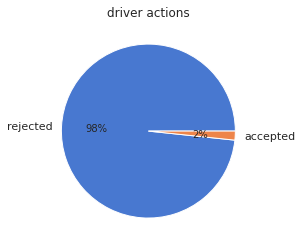

In [13]:
visualizer.plot_pie(df=df2, column='driver_action', title='driver actions')

This says a lot already. Out of the 1, 557, 740 delivery actions recorded only 25, 903 (~2%) accepted the delivery and went through

The rest ~98% accepted the delivery but the delivery was not successful

More investigation is required on this

ORDER ID

In [18]:
df2.order_id.value_counts()

401129    4122
401849    3360
415800    2922
418106    2617
405195    2129
          ... 
427525       1
427528       1
427537       1
427549       1
418710       1
Name: order_id, Length: 26492, dtype: int64

In [15]:
df2.order_id.min(), df2.order_id.max()

(392001, 517948)

There are almost around 26, 500 unique order id's in this data set

392, 001 being the minimum and 517, 948 being the maximum

In [20]:
len(df2.order_id.unique())

26492

<AxesSubplot:>

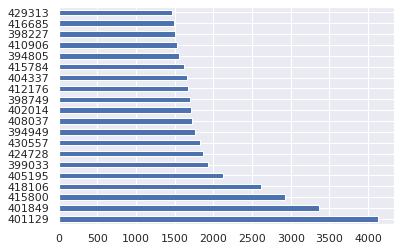

In [36]:
df2.order_id.value_counts()[:20].plot(kind='barh')

Some orders were attempted to be met more than the others

DRIVER ID

In [32]:
df2.driver_id.min(), df2.driver_id.max(), 

(121981, 247877)

In [33]:
df2.driver_id.value_counts()

245538    6941
243020    6447
242971    6258
243676    5884
243932    5793
          ... 
245840       1
247182       1
245907       1
246082       1
246602       1
Name: driver_id, Length: 1213, dtype: int64

there are over 1, 200 drivers

<AxesSubplot:>

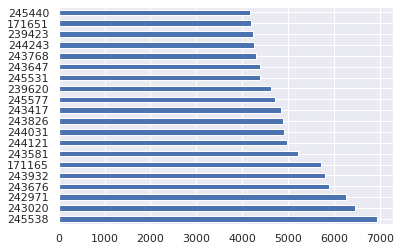

In [37]:
df2.driver_id.value_counts()[:20].plot(kind='barh')

DRIVER LOCATION

In [47]:
df2[['lat', 'lng']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557740 entries, 0 to 1557739
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   lat     1557740 non-null  float64
 1   lng     1557740 non-null  float64
dtypes: float64(2)
memory usage: 23.8 MB


In [41]:
# mlflow.log_param('data version', version)
# mlflow.log_param('data set 1 path', defs.data1)
# mlflow.log_param('data set 1 shape', df1.shape)
# #mlflow.log_param('data set 1 columns', df1.columns)
# mlflow.log_param('data set 1 data types', df1.dtypes)
# mlflow.log_param('data set 2 path', defs.data2)
# mlflow.log_param('data set 2 shape', df2.shape)
# #mlflow.log_param('data set 2 columns', df2.columns)
# mlflow.log_param('data set 2 data types', df2.dtypes)

# mlflow.end_run()